# Shark Attack Dash App

* In this project, it is aimed to create a dash app that filters the shark attacks that took place in the world between 2017 and 1917. For this, year and country information is obtained from the user and a bar chart shows the number of attacks and the gender in which the shark attacked in an unprovoked/provoked state.

In [209]:
# importing packages
import dash
import pandas as pd
import numpy as np
import chardet
import plotly.express as px
from dash import Dash
from dash import html, dcc
from dash import callback, Output, Input
from plotly.express.colors import sequential
from IPython.display import Image, display
from PIL import Image
import base64
from io import BytesIO

In [210]:
# reading data from github
df = pd.read_csv('https://raw.githubusercontent.com/ab-dum/SharkAttack_DashApp/main/attacks%205.csv', encoding='latin-1')

In [211]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
# checking all columns
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [213]:
# dropping all null values on the 'Case Number' column
df.dropna(subset=['Case Number'], inplace=True)

In [214]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6091,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6092,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0
6093,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0


In [215]:
# adding a helper count column to aggregate
df['Cnt'] = 1
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Cnt
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0,1
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0,1
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0,1
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0,1
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0,1


In [216]:
# deleting spaces in the column names
df.columns = df.columns.str.replace(' ', '')

# Bar Chart

Lets see how many people were attacked by different species of shark

In [217]:
df["Type"].unique()

array(['Unprovoked', 'Provoked', nan, 'Invalid', 'Boat', 'Sea Disaster',
       'Boating'], dtype=object)

In [218]:
# value aggregation for 'Type' column
df['Type'] = df['Type'].replace('Invalid','Unknown')
df['Type'] = df['Type'].replace('Boating','Unprovoked')
df['Type'] = df['Type'].replace('Boat','Unprovoked')

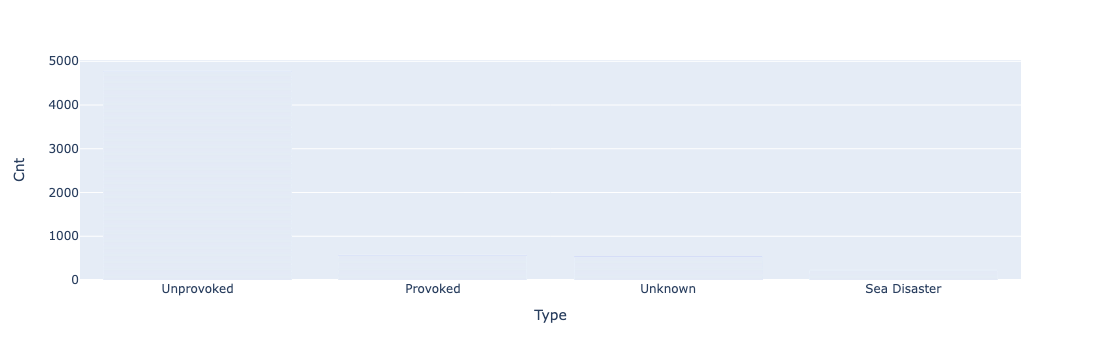

In [219]:
import plotly.graph_objects as go
bar1 = px.bar(df, x='Type', y = 'Cnt')
bar1.show()

- Values cant be seen so lets use histogram instead of bar

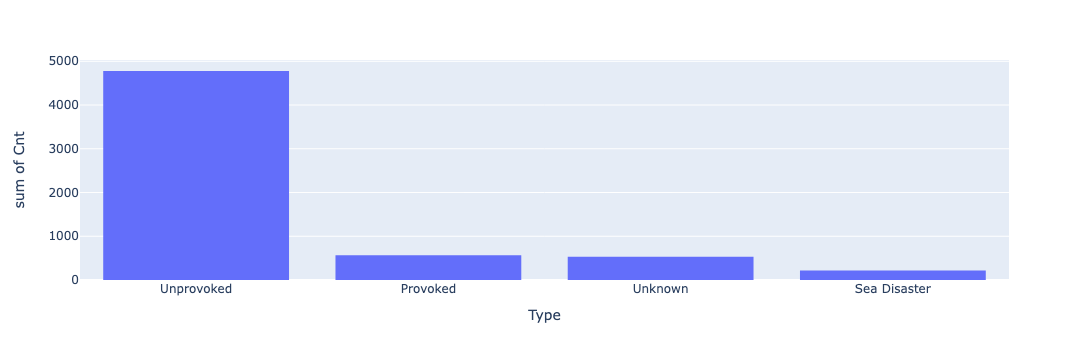

In [220]:
# easiest is to use px.histogram()
bar2 = px.histogram(df, x='Type', y = 'Cnt')
bar2.show()

In [221]:
# cleaning 'Sex' columns form zeros
df = df.drop(df[df['Sex'] == 0].index)

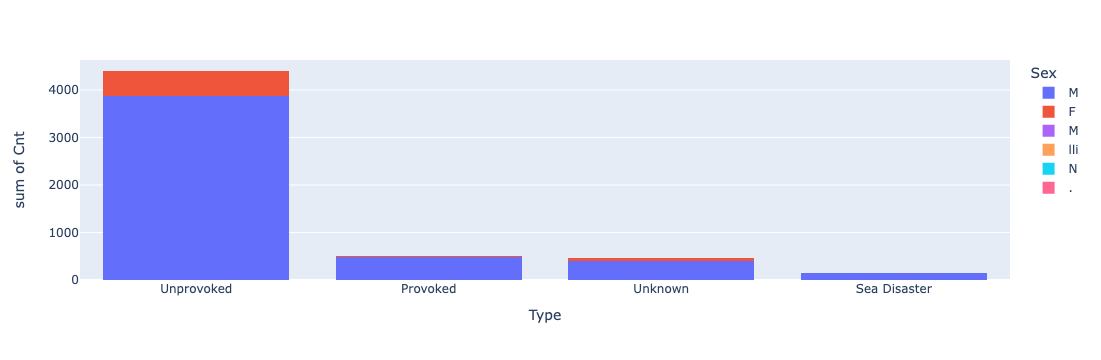

In [222]:
# creating the histogram
groupedBar = px.histogram(df, x = "Type", y = "Cnt", color = "Sex", barmode = "stack")
groupedBar

In [223]:
df["Sex"].unique()

array(['M', 'F', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [224]:
# merging and dropping some key values for the sex column
df['Sex'] = df['Sex'].replace('M ','M')
df['Sex'] = df['Sex'].replace('N','Unknown')
df = df.drop(df[df['Sex'] == '.'].index)
df['Sex'] = df['Sex'].replace('lli','LGBT+')

In [225]:
df['Year'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2017.0
1        2017.0
2        2017.0
3        2017.0
4        2017.0
          ...  
6090        0.0
6091        0.0
6092        0.0
6093        0.0
25613       NaN
Name: Year, Length: 6094, dtype: float64>

In [226]:
# The date is in a very wide range in the dataset, but let's filter the last 100 years (1917-2017) as stated in the description of the dataset.
df = df[pd.to_numeric(df['Year'], errors='coerce').notna()]
df = df.loc[df['Year'] >= 1917]
df

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Cnt
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0,1
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0,1
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0,1
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0,1
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,1917.07.15,2017-07-15,1917.0,Sea Disaster,IRELAND,Off Ireland,82 miles from Fastnet,Ship Mariston torpedoed & sunk,NaN,M,...,Morning,NaN,"Western Mail, 11/9/1917",1917.07.15-Mariston-ship.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1917.07.15,1917.07.15,953.0,1
5143,1917.06.03,2017-06-03,1917.0,Unprovoked,USA,South Carolina,Calibogue Sound,Swimming beside launch,"Walter J. Pierpont, Jr.",M,...,P.M.,NaN,"C. Creswell, GSAF; V.M. Coppleson (1958), pp.1...",1917.06.03-Pierpont.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1917.06.03,1917.06.03,952.0,1
5144,1917.05.31,2017-05-31,1917.0,Unprovoked,PHILIPPINES,Luzon Island,Canacao Bay,Swimming,"E.E., water tender of the U.S.S. Dale",M,...,17h45,NaN,"P.F. Prioleau; W.E., p.195; V.M. Coppleson (19...",1917.05.31-EE.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1917.05.31,1917.05.31,951.0,1
5145,1917.05.05,Reported 05-May-1917,1917.0,Unprovoked,KUWAIT,NaN,NaN,Diving for pearls,a young Arab,M,...,NaN,NaN,"Denton Journal, 5/5/1917",1917.05.05-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1917.05.05,1917.05.05,950.0,1


In [227]:
# converting the some numeric values of Country column into non-numeric values
df = df[pd.to_numeric(df['Country'], errors='coerce').isna()]

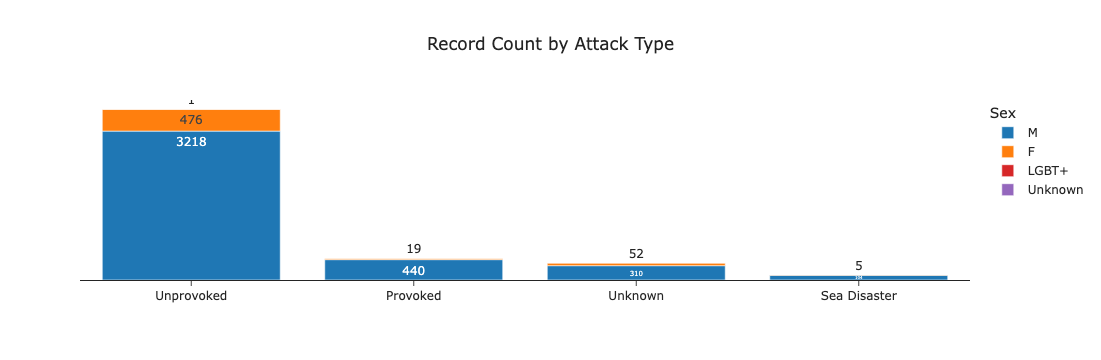

In [237]:
# customizing the bar chart
groupedBar = px.histogram(df, x = "Type", y = "Cnt", color="Sex",  title = 'Record Count by Attack Type', text_auto = True, template = 'simple_white', nbins=8)
groupedBar.update_layout(title_x = 0.5,xaxis_title = '')
groupedBar.update_yaxes(visible = False)
groupedBar


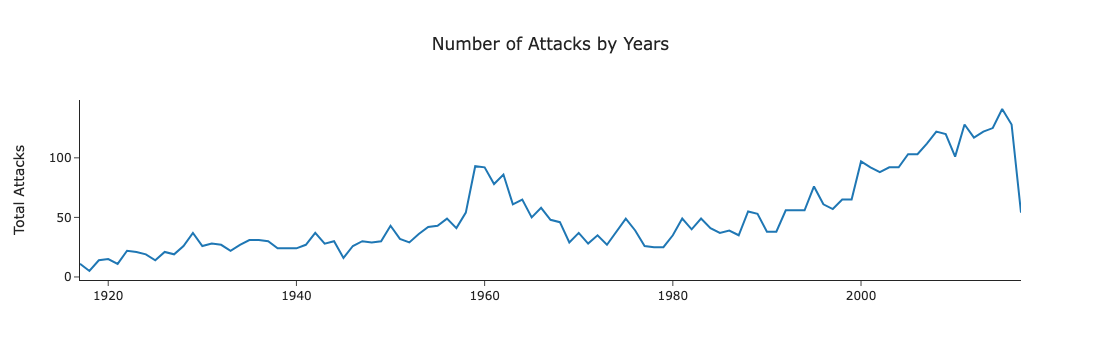

In [243]:
# creating a line chart to see in which year how many shark attacks were conducted
total_cnt_by_country_year = df.groupby(['Year'])['Cnt'].sum().reset_index()

# creating line chart
fig = px.line(total_cnt_by_country_year, x='Year', y='Cnt', title='Number of Attacks by Years',
              labels={'Year': 'Year', 'Cnt': 'Total Attacks'}, template = 'simple_white')
fig .update_layout(title_x = 0.5,xaxis_title = '')
fig.update_yaxes(visible = True)

# showing the chart
fig.show()


In [244]:
# dropping null values for Country column
df.dropna(subset=['Country'], inplace=True)

In [258]:
# changing the datatype of the Year Column form object to int
df['Year'] = df['Year'].astype(int)

In [259]:
# creating the dash app
app = Dash(__name__)

# adding a shark photo but you probably can't see it because its from my local
image_path = 'istockphoto-1199374996-612x612.jpg'
img = Image.open(image_path)
buffer = BytesIO()
img.save(buffer, format="JPEG")
pil_image = base64.b64encode(buffer.getvalue()).decode()

# creating app layout
app.layout = html.Div([
    # adding a main title
    html.H1("Shark Attacks by Attack Type", style={'color': 'blue', 'font-style': 'italic', 'text-align': 'center'}),
    html.Div([
        html.Img(src=f'data:image/jpeg;base64,{pil_image}', style={'width': '100px', 'height': '100px'}),
    ], style={'text-align': 'center'}),
    # creating space between title and labels
    html.Br(),

    # creating label to get the year information from user
    html.Label('Please select year:', style={'color': 'red','font-weight': 'bold', "text-align": "center"}),
    # creating dropdown
    dcc.Dropdown(
        id='input1',
        options=[{'label': str(year), 'value': year} for year in df['Year'].unique()],
        value=2016,style={'width': '200px'}),

    # creating label to get the country information from user
    html.Label('Please select country:', style={'color': 'purple','font-weight': 'bold', "text-align": "center"}),
    # creating dropdown
    dcc.Dropdown(
        id='input2',
        options=[{'label': country, 'value': country} for country in df['Country'].unique()],
        value="USA", style={'width':'45%'}),
    # creating a dcc graph object to pull the groupedBar we created before
    dcc.Graph(id = 'graph', figure = groupedBar, style = {'display': 'inline-block', 'width': '90%'}),

])

# calling the input and outputs
@app.callback(
    Output('graph', 'figure'),
    Input('input1','value'),
    Input('input2','value'),
)

# creating the function for trigger the callback
def update1(_input1, _input2):
    # creating a new df to filter country and year according to user choice
    filtered_df = df[(df['Country'] == _input2) & (df['Year'] == _input1)]
    groupedBar = px.histogram(filtered_df, x = "Type", y = "Cnt", color="Sex",  template = 'simple_white', nbins=1, text_auto=True)
    # updating the layout of the bar chart
    groupedBar.update_layout(
        title_text=f'Attacks in Country {_input2} in Year {_input1}',
        title=dict(x=0.5, font=dict(color=sequential.Aggrnyl[3]))   # Center title along the x-axis
    )
   
    return groupedBar

# running the app
app.run(debug = True)


   